In [60]:
# Import các thư viện cần thiết
from sklearn.datasets import fetch_lfw_people  # Cung cấp dataset LFW (Labeled Faces in the Wild)
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành training set và testing set
from sklearn.decomposition import NMF  # Sử dụng thuật toán NMF để giảm chiều dữ liệu
from sklearn.neural_network import MLPClassifier  # Mô hình mạng neuron đa tầng để phân loại khuôn mặt
from sklearn.metrics import classification_report  # Báo cáo đánh giá mô hình
import matplotlib.pyplot as plt  # Thư viện trực quan hóa dữ liệu
import numpy as np
import getdata 


In [61]:
data, target, target_names, image_shape = getdata.get_lfw_people_with_100_images()
X = getdata.create_image_matrix(data).T
h,w = image_shape
y = target  

In [62]:
print(X.shape)

(500, 2914)


In [63]:
# Chia dữ liệu thành training set và testing set với tỷ lệ 7:3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)  


In [64]:
n_components = 30  # Số chiều dữ liệu sau khi giảm chiều

# Compute a NMF
nmf = NMF(n_components = n_components, init = 'random', random_state = 0).fit(X_train)  

# Sử dụng thuật toán NMF để giảm chiều dữ liệu
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)


c:\Users\HL080221\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\HL080221\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [65]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(300,), max_iter=500, alpha=1e-4, solver='adam', tol=1e-4, random_state=0).fit(X_train_nmf, y_train)  
# Sử dụng mô hình mạng neuron đa tầng để phân loại khuôn mặt

y_pred = clf.predict(X_test_nmf)  # Dự đoán nhãn cho testing set

print(classification_report(y_test, y_pred, target_names = target_names))  # Báo cáo đánh giá mô hình

#Visualization

Fitting the classifier to the training set
                   precision    recall  f1-score   support

     Colin Powell       0.68      0.88      0.77        26
  Donald Rumsfeld       0.82      0.79      0.81        34
    George W Bush       0.83      0.71      0.76        34
Gerhard Schroeder       0.63      0.68      0.65        25
       Tony Blair       0.74      0.65      0.69        31

         accuracy                           0.74       150
        macro avg       0.74      0.74      0.74       150
     weighted avg       0.75      0.74      0.74       150



c:\Users\HL080221\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


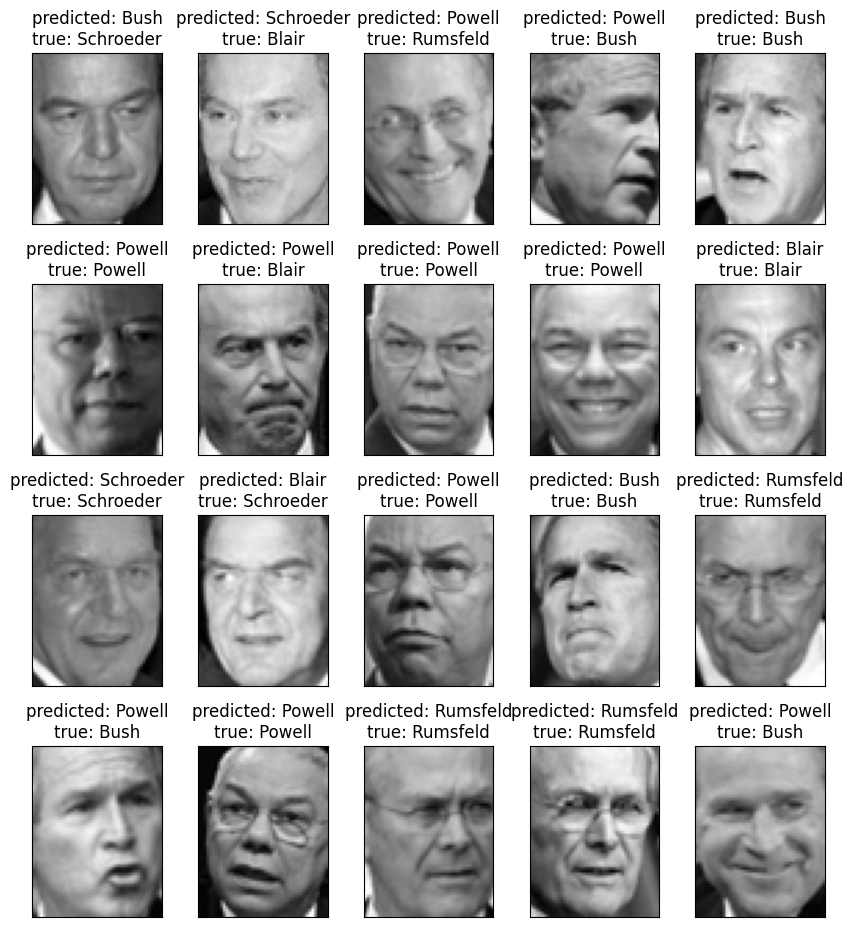

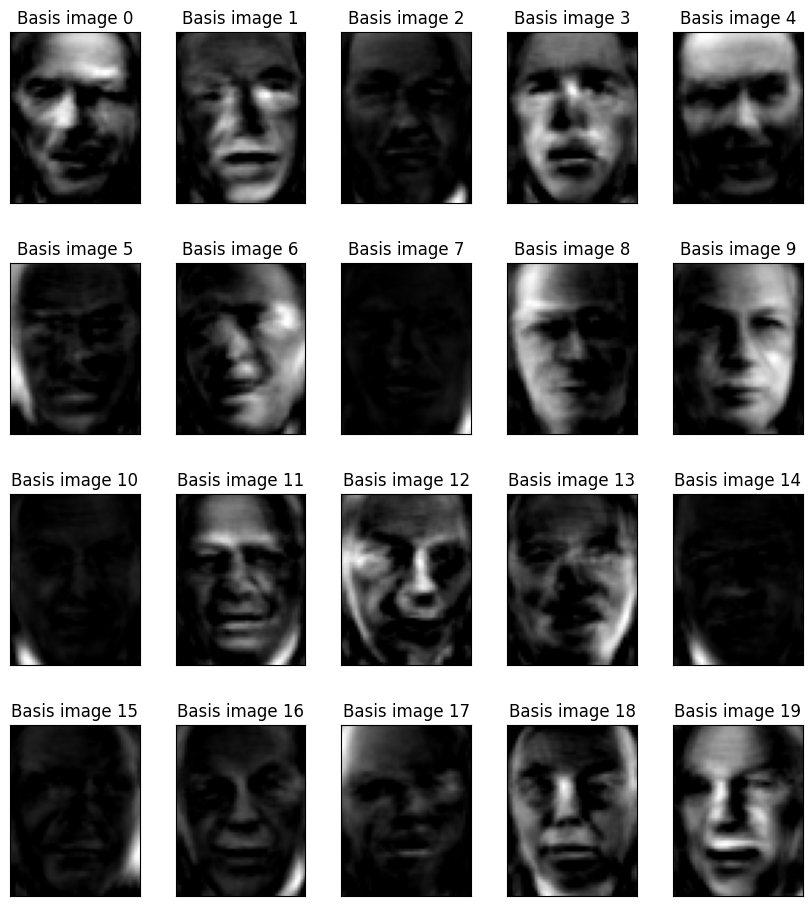

In [88]:
def plot_gallery(images, titles, h, w, rows = 4, cols = 5):
    plt.figure(figsize = (1.8 * cols, 2.4 * rows))
    plt.subplots_adjust(bottom = 0, left = .01, right = .90, top = .90, hspace= .35)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape(h,w), cmap=plt.cm.gray)
        plt.title(titles[i],size = 12)
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)
eigenfaces = nmf.components_.reshape((n_components, h, w))
eigenface_titles = ["Basis image {0}".format(i) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles,h, w)
plt.show()